In [343]:
# Set up
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.rc('axes', labelsize=14)
mlp.rc('xtick', labelsize=12)
mlp.rc('ytick', labelsize=12)

## Problem 
### Can I Predict whether the next NFL play wil be a run or a pass?

## Pre-Processing data
 ### Data collection
    Data was collection from FTNData.com's NFL api.
    I wrote a script to make an api call for each nfl game between 2017 and 2020.
    I then flattened the data and got rid of unecesary data.
    I got personnel data from sharpfootballstats.com
 ### Processing
    There was alot of weather data missing so I decided to just get rid of all the weather details
    Other columns with null values were for post play data so I dropped those.
    To add the personnel groupings, I created a list, for both run and pass, the size of my dataset with
    the correct proportions of personnel values.
    I then split the main data into pass and run, and added the corresponding shuffled lists into a new column.

## Model Selection
    I went with RandomForestClassifier
    At first it was giving a perfect accuracy score so I knew it was not right
    I tweaked the n_estimators and max_depth to help with over fitting 

## Results
    The model performed much better than anticipated.  
    I was expecting it to be closer to .50 because pretty much all the data was a 50/50 to 55/45
    split between pass/run.
    Having more data on the players and formations would help with the accuracy.

In [344]:
# Read in personnel csv
import csv

filename = os.path.join("datasets", "nfl-pp-data", "personnel.csv")

d = {}

# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
 
    # extracting each data row one by one
    for row in csvreader:
        d[row[0]] = row[1:]
        

In [345]:
# make list of personnels
import random

pass_list = []
index = 0
for p in d['rpass']:
    for i in range(int(p)):
        pass_list.append(d['personnel'][index])
    index += 1

run_list = []
index = 0
for p in d['nrun']:
    for i in range(int(p)):
        run_list.append(d['personnel'][index])
    index += 1
        
random.shuffle(pass_list)
random.shuffle(run_list)

#### Post play
- player, loc, type

#### Not relevent
- day, timo, timd, wk, len, fd, min, sec, gid, stad, cond, surf

#### Missing data
- temp, humd, wspd, wdir

In [346]:
# Load Data (include reference to where you found your data)
datapath = os.path.join("datasets", "nfl-pp-data", "")
plays_all = pd.read_csv(datapath + "sea_pbp_v2.csv", thousands=',')

plays_all['score_diff'] = plays_all['ptso'] - plays_all['ptsd']
plays_all.drop(["off","nh","dseq","ptso","ptsd","v","h","temp", "humd", "wspd", "wdir", "day", "wk", "timo", "timd", "len", "fd", "min", "sec", "gid", "stad", "cond", "surf"],
              axis=1, inplace=True)

# Set index to play ID
plays_all.set_index("pid", inplace=True)

plays_all.replace(to_replace =["PASS"], value=1, inplace=True)
plays_all.replace(to_replace =["RUSH"], value=0, inplace=True)

# add personnell data
pas = plays_all.loc[plays_all['type'] == 1]
run = plays_all.loc[plays_all['type'] == 0]

pas['prnl'] = pass_list
run['prnl'] = run_list

tempplays = pd.concat([run, pas], axis=0)
plays_all['prnl'] = tempplays['prnl']
# plays_all['num_wr'] = np.nan


plays_all.loc[plays_all['prnl'] == '1_1', 'num_wr'] = 3 
plays_all.loc[plays_all['prnl'] == '1_2', 'num_wr'] = 2 
plays_all.loc[plays_all['prnl'] == '2_1', 'num_wr'] = 2 
plays_all.loc[plays_all['prnl'] == '2_2', 'num_wr'] = 1
plays_all.loc[plays_all['prnl'] == '1_3', 'num_wr'] = 1 
plays_all.loc[plays_all['prnl'] == '1_0', 'num_wr'] = 4
plays_all.loc[plays_all['prnl'] == '2_0', 'num_wr'] = 3
plays_all.loc[plays_all['prnl'] == '2_3', 'num_wr'] = 0
plays_all.loc[plays_all['prnl'] == '0_1', 'num_wr'] = 4 
plays_all.loc[plays_all['prnl'] == '0_0', 'num_wr'] = 5 
plays_all.loc[plays_all['prnl'] == '1_4', 'num_wr'] = 0
plays_all.loc[plays_all['prnl'] == '0_2', 'num_wr'] = 2 

# Data For each season
plays_2017 = plays_all.loc[plays_all['seas'] == 2017]
plays_2018 = plays_all.loc[plays_all['seas'] == 2018]
plays_2019 = plays_all.loc[plays_all['seas'] == 2019]
plays_2020 = plays_all.loc[plays_all['seas'] == 2020]


C:\Users\Nathan\AppData\Local\Temp/ipykernel_23988/1895778316.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pas['prnl'] = pass_list
C:\Users\Nathan\AppData\Local\Temp/ipykernel_23988/1895778316.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run['prnl'] = run_list


In [347]:
plays_all.head()

,def,type,qtr,secl,dwn,ytg,yfog,zone,sg,player,loc,seas,score_diff,prnl,num_wr
pid,,,,,,,,,,,,,,,
743383,GB,1,1,3593,1,10,39,2,1,JG-2900,SL,2017,0,1_1,3.0
743384,GB,0,1,3588,2,10,39,2,0,DB-0500,RE,2017,0,1_1,3.0
743385,GB,1,1,3552,3,13,36,2,1,NaN,NaN,2017,0,1_1,3.0
743396,GB,0,1,3266,1,10,50,3,0,EL-0010,LE,2017,0,2_0,3.0
743397,GB,0,1,3232,2,8,52,3,1,EL-0010,MD,2017,0,1_1,3.0


In [348]:
plays_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 743383 to 915799
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   def         4313 non-null   object 
 1   type        4313 non-null   int64  
 2   qtr         4313 non-null   int64  
 3   secl        4313 non-null   int64  
 4   dwn         4313 non-null   int64  
 5   ytg         4313 non-null   int64  
 6   yfog        4313 non-null   int64  
 7   zone        4313 non-null   int64  
 8   sg          4313 non-null   int64  
 9   player      4091 non-null   object 
 10  loc         4202 non-null   object 
 11  seas        4313 non-null   int64  
 12  score_diff  4313 non-null   int64  
 13  prnl        4313 non-null   object 
 14  num_wr      4313 non-null   float64
dtypes: float64(1), int64(10), object(4)
memory usage: 539.1+ KB


In [349]:
# Fill all pass plays with most common reciever and pass loc
# Fill all run plays with most common rusher and run loc
def filldata(df):
    r = df.loc[plays_all['type'] == 'RUSH']
    r.fillna(r.mode().iloc[0], inplace=True)
    
    p = df.loc[plays_all['type'] == 'PASS']
    p.fillna(p.mode().iloc[0], inplace=True)
    return p.append(r)
    
    

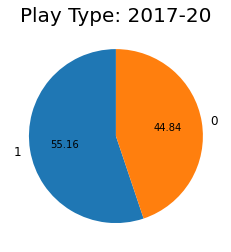

In [350]:
play_counts = plays_all["type"].value_counts()
plt.title("Play Type: 2017-20", fontsize = 20)
plt.pie(play_counts.array, labels = play_counts.index,
    autopct = "%.2f", startangle = 90)
plt.show()

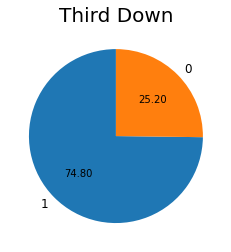

1    644
0    217
Name: type, dtype: int64


In [351]:
play_counts = plays_all['type'].loc[plays_all["dwn"] == 3].value_counts()
plt.title("Third Down", fontsize = 20)
plt.pie(play_counts.array, labels = play_counts.index,
    autopct = "%.2f", startangle = 90)
plt.show()
print(play_counts)

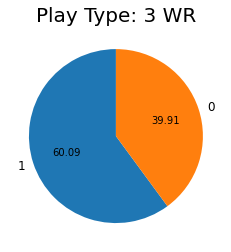

In [352]:
play_counts = plays_all['type'].loc[plays_all["num_wr"] == 3].value_counts()
plt.title("Play Type: 3 WR", fontsize = 20)
plt.pie(play_counts.array, labels = play_counts.index,
    autopct = "%.2f", startangle = 90)
plt.show()

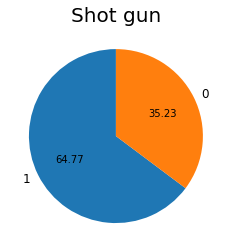

1    1864
0    1014
Name: type, dtype: int64


In [353]:
play_counts = plays_all['type'].loc[plays_all["sg"] == 1].value_counts()
plt.title("Shot gun", fontsize = 20)
plt.pie(play_counts.array, labels = play_counts.index,
    autopct = "%.2f", startangle = 90)
plt.show()
print(play_counts)

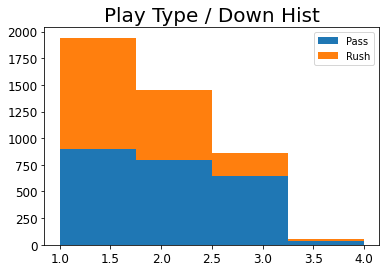

In [354]:
plt.title("Play Type / Down Hist", fontsize = 20)
plt.hist(
    [plays_all["dwn"].where(plays_all["type"] == 1),
     plays_all["dwn"].where(plays_all["type"] == 0)],
    label=["Pass", "Rush"], stacked=True, bins=4)
plt.legend()
plt.show()

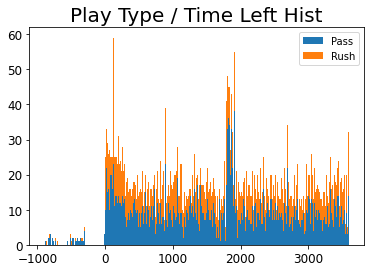

In [355]:
plt.title("Play Type / Time Left Hist", fontsize = 20)
plt.hist(
    [plays_all["secl"].where(plays_all["type"] == 1),
     plays_all["secl"].where(plays_all["type"] == 0)],
    label=["Pass", "Rush"], stacked=True, bins=300)
plt.legend()
plt.show()

In [356]:
plays = plays_all

y=plays["type"]
x=plays.drop(['type','player', 'loc'], axis=1)


In [357]:
# split the data into train and test (80% train, 20% test)
# All plays between 2017-20, random train/test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)
x_train.head()

,def,qtr,secl,dwn,ytg,yfog,zone,sg,seas,score_diff,prnl,num_wr
pid,,,,,,,,,,,,
878398,NE,4,459,1,10,47,3,1,2020,5,1_1,3.0
868254,ARI,2,2002,2,10,18,1,0,2019,-7,1_2,2.0
853633,SF,4,276,1,10,36,2,0,2019,0,1_1,3.0
753668,LA,2,2566,3,7,29,2,1,2017,-7,1_1,3.0
758679,NYG,3,1519,3,7,53,3,1,2017,-4,1_1,3.0


In [358]:
y_train.head()

pid
878398    1
868254    0
853633    1
753668    1
758679    1
Name: type, dtype: int64

In [359]:

#### Categorical
cat_list = ["def", "qtr", "seas", "sg", "dwn", "prnl"]

#### Numerical
num_list = ["secl", "ytg", "yfog", "score_diff", "num_wr"]

In [360]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

# set up and run pre-processing pipeline
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=True)),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_list),
        ("cat", cat_pipeline, cat_list),
    ])

# fit the pipeline to the training data
full_pipeline.fit(x_train)

# transform training and testing data
x_train = full_pipeline.transform(x_train)
x_test = full_pipeline.transform(x_test)

In [361]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [362]:
# Train Linear model
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)

print(cross_val_score(sgd, x_train, y_train, cv=4, scoring="accuracy"))
train_pred = sgd.predict(x_train)
print(confusion_matrix(y_train, train_pred))

print(precision_score(y_train, train_pred,pos_label=1))
print(recall_score(y_train, train_pred, pos_label=1))

print(roc_auc_score(y_train, train_pred))

[0.61413673 0.67091541 0.63805104 0.70069606]
[[1021  525]
 [ 570 1334]]
0.7175901022054868
0.7006302521008403
0.6805221118201485


In [363]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
import pickle

forest = RandomForestClassifier(n_estimators=1250, max_depth=15, random_state=42)
forest.fit(x_train, y_train)

# Save model
filename = 'finalized_model.sav'
pickle.dump(forest, open(filename, 'wb'))

print("Cross validation")
print(cross_val_score(forest, x_train, y_train, cv=5, scoring="accuracy"))

print("Confusion matrix")
train_pred = forest.predict(x_train)
print(confusion_matrix(y_train, train_pred))

print("Precision / Recall")
print(precision_score(y_train, train_pred, pos_label=1))
print(recall_score(y_train, train_pred, pos_label=1))

print("ROC AUC SCORE")
print(roc_auc_score(y_train, train_pred))

Cross validation
[0.69710145 0.69130435 0.71014493 0.69130435 0.6942029 ]
Confusion matrix
[[1279  267]
 [  69 1835]]
Precision / Recall
0.8729781160799239
0.9637605042016807
ROC AUC SCORE
0.8955283762923021


In [364]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred = loaded_model.predict(x_test)

In [365]:
print("Confusion matrix")
print(confusion_matrix(y_test, test_pred))

print("Precision / Recall")
print(precision_score(y_test, test_pred, pos_label=1))
print(recall_score(y_test, test_pred, pos_label=1))
print("ROC AUC SCORE")
print(roc_auc_score(y_test, test_pred))

Confusion matrix
[[228 160]
 [ 96 379]]
Precision / Recall
0.7031539888682746
0.7978947368421052
ROC AUC SCORE
0.6927618014107433


In [366]:
actual = y_test.values.tolist()

In [367]:
add = 0
count = 0

In [368]:
for i in range(0, len(test_pred)):
    if test_pred[i] == actual[i]:
        add += 1
    count += 1
    
print(add/count)

add = 0
count = 0

0.7033603707995365
